# **Data Visualisation**

In [4]:
import pandas as pd

df = pd.read_csv("../Data/Cleaned/cleaned_data_set.csv")
df.head()  # View first 5 few rows

,Store,Type_x,Size_x,Type_y,Size_y,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315,A,151315,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,A,151315,A,151315,12/02/2010,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,A,151315,A,151315,19/02/2010,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,A,151315,A,151315,26/02/2010,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,A,151315,A,151315,05/03/2010,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


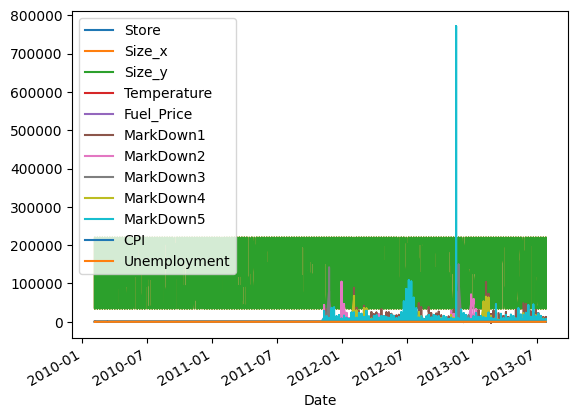

In [7]:
import matplotlib.pyplot as plt
# parse your dd/mm/YYYY dates correctly
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date').plot()
plt.show()

In [10]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime format

In [11]:
summer_df = df[(df['Date'].dt.month >= 6) & (df['Date'].dt.month <= 8)]

In [13]:
pre_summer_df = df[df['Date'].dt.month == 5]  # May (before summer)
summer_prices = summer_df['Fuel_Price'].mean()  # Average fuel price in summer
pre_summer_prices = pre_summer_df['Fuel_Price'].mean()  # Average fuel price before summer

print(f"Average fuel price before summer: {pre_summer_prices}")
print(f"Average fuel price in summer: {summer_prices}")

Average fuel price before summer: 3.582707189542483
Average fuel price in summer: 3.4218939814814817


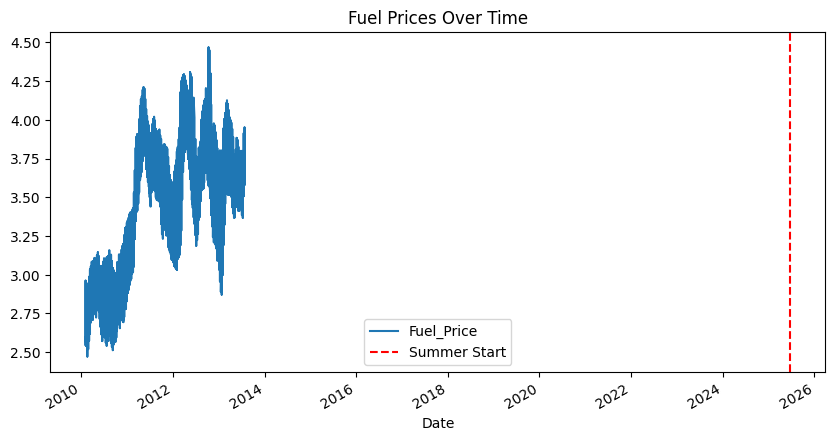

In [14]:
import matplotlib.pyplot as plt

df.set_index('Date')['Fuel_Price'].plot(figsize=(10,5), title="Fuel Prices Over Time")
plt.axvline(pd.to_datetime("2025-06-21"), color="red", linestyle="--", label="Summer Start")
plt.legend()
plt.show()

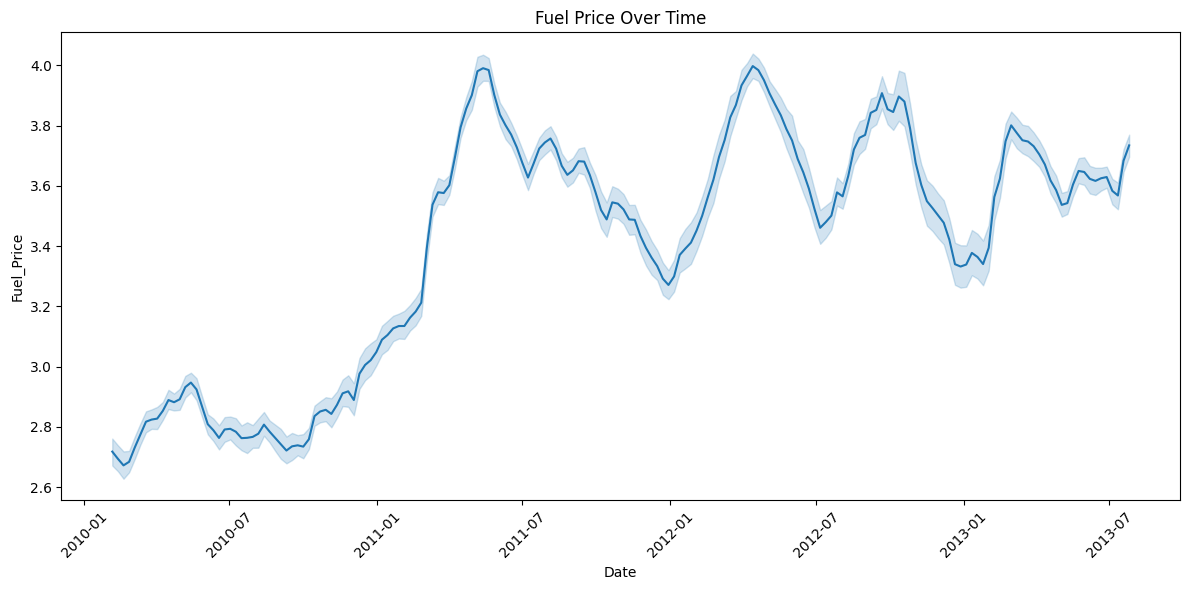

In [15]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Date", y="Fuel_Price")
plt.xticks(rotation=45)
plt.title("Fuel Price Over Time")
plt.tight_layout()
plt.show()

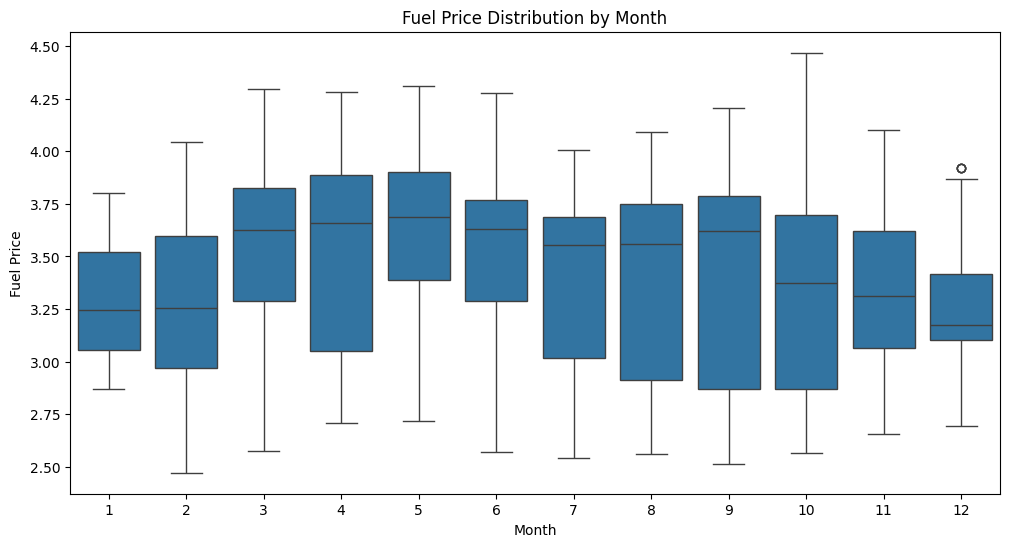

In [16]:
# Extract month from the Date column
df['Month'] = df['Date'].dt.month

# Plot fuel price distribution by month
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Month', y='Fuel_Price')
plt.title('Fuel Price Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Fuel Price')
plt.show()

C:\Users\ajayc\AppData\Local\Temp\ipykernel_13472\4212368282.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_sales_per_store, x='Store', y='Fuel_Price', palette='viridis')


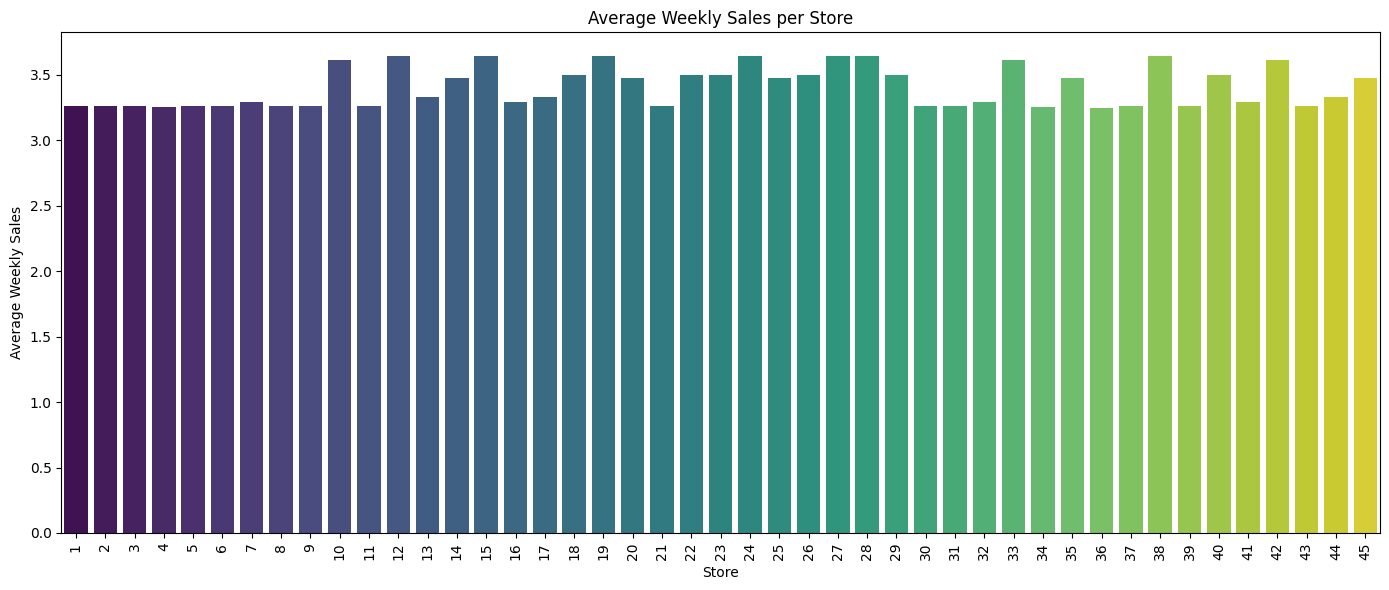

In [18]:
# Calculate average weekly sales per store and plot as a bar chart
avg_sales_per_store = df.groupby('Store')['Fuel_Price'].mean().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(data=avg_sales_per_store, x='Store', y='Fuel_Price', palette='viridis')
plt.title('Average Weekly Sales per Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

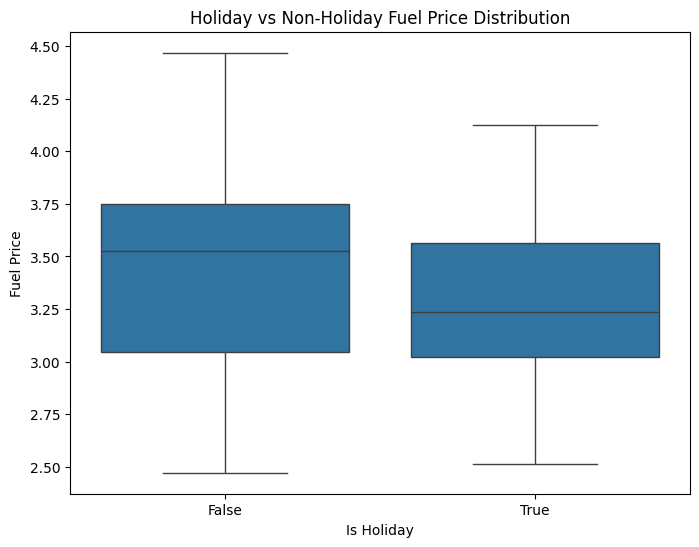

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='IsHoliday', y='Fuel_Price')
plt.title('Holiday vs Non-Holiday Fuel Price Distribution')
plt.xlabel('Is Holiday')
plt.ylabel('Fuel Price')
plt.show()